In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [4]:
path_dir = './LFW-FER/eval/negative/'
file_list = os.listdir(path_dir)
# file_list[0]

In [5]:
cv2.CascadeClassifier

cv2.CascadeClassifier

In [15]:
def fig_set(fig, rows, cols, num, img, label):
    ax = fig.add_subplot(rows, cols, num)
    ax.imshow(img)
    ax.set_xlabel(label)
    ax.set_xticks([]), ax.set_yticks([])

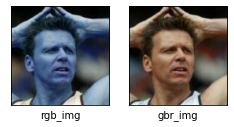

In [17]:
img = np.zeros((120, 120), dtype=np.uint8)
img_rgb = cv2.imread('./LFW-FER/eval/negative/Steve_Backley_0002.jpg')
img_gbr = img_rgb[:,:,::-1]

fig = plt.figure()
rows, cols = 1, 3

fig_set(fig, rows, cols, 1, img_rgb, 'rgb_img')
fig_set(fig, rows, cols, 2, img_gbr, 'gbr_img')

- plt.imshow()함수는 RGB 순으로 해석, OpenCV는 컬러 이미지를 BGR순으로 인식 하므로 컬러를 뒤집어서 나타내 주어야함

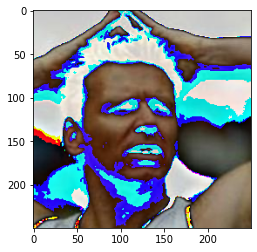

In [31]:
img1 = img + 200
img2 = img - 100
plt.imshow(img1)

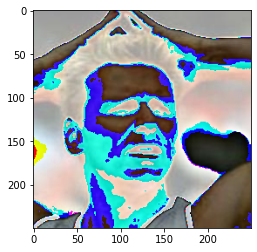

In [32]:
plt.imshow(img2)


In [36]:
cv2.imshow('1',img)

: 

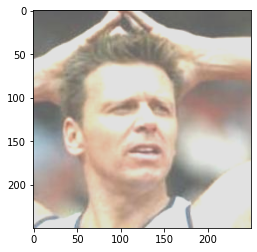

In [34]:
img1 = np.clip(img.astype('int32')+100,0,225).astype('uint8')

plt.imshow(img1)

### dlib 모델 예제

In [2]:
import dlib

- get_frontal_face_detector는 HOG(Histogram of Oriented Gradient) + SVM을 활용

In [17]:
detector = dlib.get_frontal_face_detector()
faces = detector(img)

for face in faces:
    left = face.left()
    right = face.right()
    top = face.top()
    bottom = face.bottom()
    print(left, right, top, bottom)
    # 위치 정보를 활용해 사각형 그리기
    img = cv2.rectangle(
        img, (left, top), (right, bottom), (0, 0, 255), 3
    )
    cv2.imwrite("face-rect.jpg", img)


65 189 79 203


In [4]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2


def main():
    # construct the argument parser and parse the arguments
    ap = argparse.ArgumentParser()
    ap.add_argument("-p", "--shape-predictor", required=True, help="path to facial landmark predictor")
    ap.add_argument("-i", "--image", required=True, help="path to input image")
    ap.add_argument('--draw', nargs='?', const=True, type=bool, default=False, help="Fill landmarks")

    args = vars(ap.parse_args())

    # initialize dlib's face detector (HOG-based) and then create
    # the facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(args["shape_predictor"])

    # load the input image, resize it, and convert it to grayscale
    image = cv2.imread(args["image"])
    image = imutils.resize(image, width=500)

    if args['draw']:
        draw_individual_detections(image, detector, predictor)
    else:
        show_raw_detection(image, detector, predictor)


def show_raw_detection(image, detector, predictor):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)

    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # show the face number
        cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

    # show the output image with the face detections + facial landmarks
    cv2.imshow("Output", image)
    cv2.waitKey(0)


def draw_individual_detections(image, detector, predictor):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)

    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # loop over the face parts individually
        for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
            # clone the original image so we can draw on it, then
            # display the name of the face part on the image
            clone = image.copy()
            cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                        0.7, (0, 0, 255), 2)

            # loop over the subset of facial landmarks, drawing the
            # specific face part
            for (x, y) in shape[i:j]:
                cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)

            # extract the ROI of the face region as a separate image
            (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
            roi = image[y:y + h, x:x + w]
            roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)

            # show the particular face part
            cv2.imshow("ROI", roi)
            cv2.imshow("Image", clone)
            cv2.waitKey(0)

        # visualize all facial landmarks with a transparent overlay
        output = face_utils.visualize_facial_landmarks(image, shape)
        cv2.imshow("Image", output)
        cv2.waitKey(0)


if __name__ == '__main__':
    main()

usage: ipykernel_launcher.py [-h] -p SHAPE_PREDICTOR -i IMAGE [--draw [DRAW]]
ipykernel_launcher.py: error: the following arguments are required: -p/--shape-predictor, -i/--image


SystemExit: 2

c:\ProgramData\Anaconda3\envs\OpenCV\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
